# Team - 10

### Importing required libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

In [37]:
df = pd.read_csv('/content/train_data.csv')

In [38]:
df

Period Code Cycle ID      B_2      B_3  B_4     B_5    B_9   B_10 B_14  \
0               1        1  -0.0007  -0.0004  100  518.67  14.62  21.61  1.3   
1               1        2   0.0019  -0.0003  100  518.67  14.62  21.61  1.3   
2               1        3  -0.0043   0.0003  100  518.67  14.62  21.61  1.3   
3               1        4   0.0007        0  100  518.67  14.62  21.61  1.3   
4               1        5  -0.0019  -0.0002  100  518.67  14.62  21.61  1.3   
...           ...      ...      ...      ...  ...     ...    ...    ...  ...   
16499          82      122  -0.0001   0.0002  100  518.67  14.62  21.61  1.3   
16500          82      123   0.0016   0.0002  100  518.67  14.62   21.6  1.3   
16501          82      124  Missing  -0.0005  100  518.67  14.62  21.61  1.3   
16502          82      125   0.0001  -0.0002  100  518.67  14.62   21.6  1.3   
16503          82      126   0.0033  -0.0001  100  518.67  14.62   21.6  1.3   

        B_15  ...     B_18    B_19  B_20 B_21  B_22 B_23   B_24     B_25  \
0      47.47  ...  8138.62  8.4195  0.03  392  2388  100  39.06   23.419   
1      47.49  ...  8131.49  8.4318  0.03  392  2388  100     39  23.4236   
2      47.27  ...  8133.23  8.4178  0.03  390  2388  100  38.95  23.3442   
3      47.13  ...  8133.83  8.3682  0.03  392  2388  100  38.88  23.3739   
4      47.28  ...   8133.8  8.4294  0.03  393  2388  100   38.9  23.4044   
...      ...  ...      ...     ...   ...  ...   ...  ...    ...      ...   
16499  47.48  ...  8163.51  8.4098  0.03  392  2388  100  38.88  23.3777   
16500  47.15  ...  8153.63  8.3746  0.03  392  2388  100  38.89  23.3542   
16501  47.48  ...  8162.75   8.414  0.03  391  2388  100   38.9  23.3692   
16502  47.12  ...  8150.24  8.4058  0.03  391  2388  100  38.99  23.4025   
16503  47.29  ...  8152.98  8.4527  0.03  394  2388  100  39.04    23.33   

      Good/Bad       timestamp  
0            0   3/1/2020 0:00  
1            0   3/1/2020 0:05  
2            0   3/1/2020 0:10  
3            0   3/1/2020 0:15  
4            0   3/1/2020 0:20  
...        ...             ...  
16499        0  4/27/2020 6:55  
16500        0  4/27/2020 7:00  
16501        0  4/27/2020 7:05  
16502        0  4/27/2020 7:10  
16503        0  4/27/2020 7:15  

[16504 rows x 22 columns]

### Gaining an idea about the dataset

In [39]:
df.shape

(16504, 22)

In [40]:
df.columns

Index(['Period Code', 'Cycle ID', 'B_2', 'B_3', 'B_4', 'B_5', 'B_9', 'B_10',
       'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'B_21', 'B_22',
       'B_23', 'B_24', 'B_25', 'Good/Bad', 'timestamp'],
      dtype='object')

In [41]:
df.dtypes

Period Code    object
Cycle ID       object
B_2            object
B_3            object
B_4            object
B_5            object
B_9            object
B_10           object
B_14           object
B_15           object
B_16           object
B_17           object
B_18           object
B_19           object
B_20           object
B_21           object
B_22           object
B_23           object
B_24           object
B_25           object
Good/Bad       object
timestamp      object
dtype: object

In [42]:
df.isnull().sum()

Period Code    29
Cycle ID       36
B_2            40
B_3            44
B_4            42
B_5            35
B_9            29
B_10           44
B_14           44
B_15           46
B_16           37
B_17           41
B_18           35
B_19           37
B_20           40
B_21           29
B_22           27
B_23           31
B_24           41
B_25           37
Good/Bad       39
timestamp       0
dtype: int64

### Cleaning the data before training

In [43]:
df_filtered = df.drop(["Period Code", "Cycle ID", "B_4", "B_5", "B_9", "B_10", "B_14","B_20", "B_22", "B_23"], axis=1)
df_filtered.head()

B_2      B_3   B_15    B_16     B_17     B_18    B_19 B_21   B_24  \
0  -0.0007  -0.0004  47.47  521.66  2388.02  8138.62  8.4195  392  39.06   
1   0.0019  -0.0003  47.49  522.28  2388.07  8131.49  8.4318  392     39   
2  -0.0043   0.0003  47.27  522.42  2388.03  8133.23  8.4178  390  38.95   
3   0.0007        0  47.13  522.86  2388.08  8133.83  8.3682  392  38.88   
4  -0.0019  -0.0002  47.28  522.19  2388.04   8133.8  8.4294  393   38.9   

      B_25 Good/Bad      timestamp  
0   23.419        0  3/1/2020 0:00  
1  23.4236        0  3/1/2020 0:05  
2  23.3442        0  3/1/2020 0:10  
3  23.3739        0  3/1/2020 0:15  
4  23.4044        0  3/1/2020 0:20

In [44]:
outliers = ['Bad', 'no connection', 'stop', 'Missing', 'start', 'No data', 'No Data', 'no connection', 'I/O', 'no response', 'NaN']

In [45]:
column_list = ["B_2", "B_3","B_15", "B_16", "B_17", "B_18", "B_19", "B_21", "B_24", "B_25", "Good/Bad"]
for i in column_list:
  for j in outliers:
    df_filtered.loc[df_filtered[i] == j, i] = np.nan
  df_filtered[i].fillna(method = "ffill", inplace=True)
  print(df_filtered[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0


In [46]:
(df_filtered["B_2"] == "Bad").sum()

0

In [47]:
df_filtered.shape

(16504, 12)

In [48]:
numeric_columns = ["B_2", "B_3","B_15", "B_16", "B_17", "B_18", "B_19", "B_21", "B_24", "B_25", "Good/Bad"]

for i in numeric_columns:
  df_filtered[i] = pd.to_numeric(df_filtered[i])

df_filtered.dtypes

B_2          float64
B_3          float64
B_15         float64
B_16         float64
B_17         float64
B_18         float64
B_19         float64
B_21           int64
B_24         float64
B_25         float64
Good/Bad       int64
timestamp     object
dtype: object

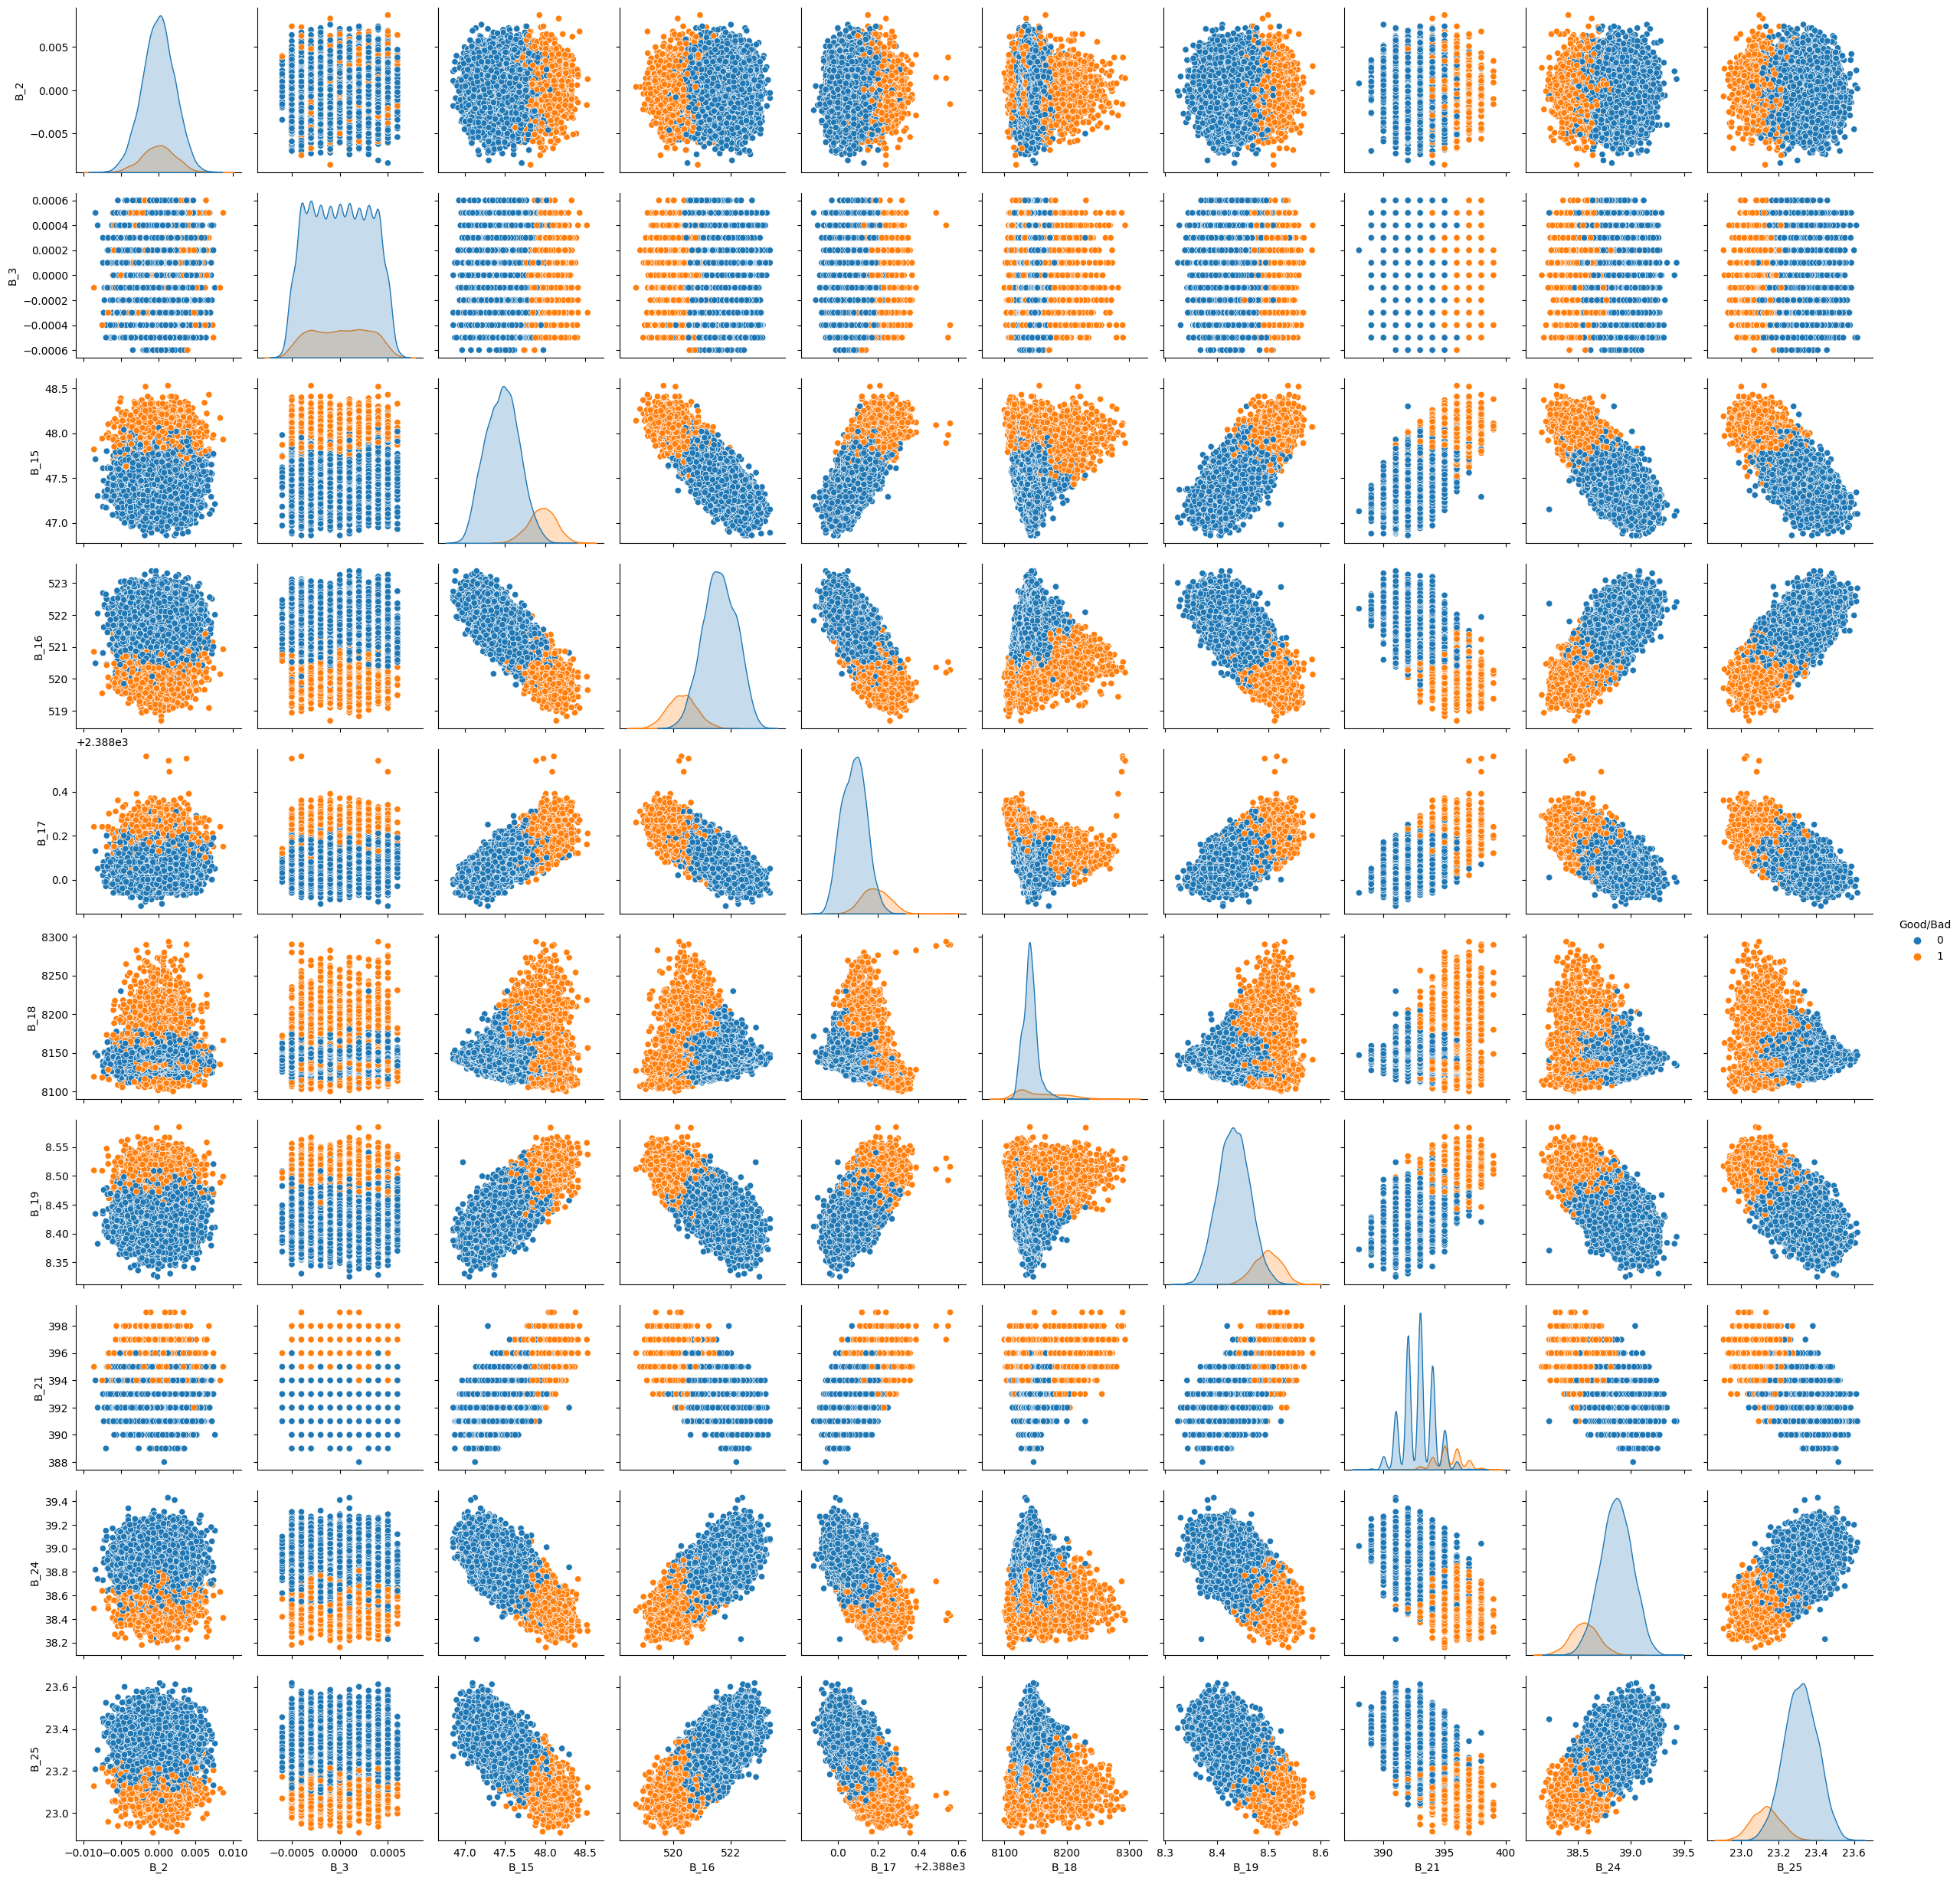

In [49]:
sns.pairplot(df_filtered, hue = "Good/Bad")

In [50]:
from datetime import datetime, timedelta

df_filtered['timestamp'] = pd.to_datetime(df_filtered['timestamp'], errors='coerce')
df_filtered['timestamp'] = df_filtered['timestamp'].dt.strftime('%m/%d/%Y %H:%M')

df_filtered

B_2     B_3   B_15    B_16     B_17     B_18    B_19  B_21   B_24  \
0     -0.0007 -0.0004  47.47  521.66  2388.02  8138.62  8.4195   392  39.06   
1      0.0019 -0.0003  47.49  522.28  2388.07  8131.49  8.4318   392  39.00   
2     -0.0043  0.0003  47.27  522.42  2388.03  8133.23  8.4178   390  38.95   
3      0.0007  0.0000  47.13  522.86  2388.08  8133.83  8.3682   392  38.88   
4     -0.0019 -0.0002  47.28  522.19  2388.04  8133.80  8.4294   393  38.90   
...       ...     ...    ...     ...      ...      ...     ...   ...    ...   
16499 -0.0001  0.0002  47.48  521.37  2388.05  8163.51  8.4098   392  38.88   
16500  0.0016  0.0002  47.15  522.09  2388.05  8153.63  8.3746   392  38.89   
16501  0.0016 -0.0005  47.48  522.52  2388.00  8162.75  8.4140   391  38.90   
16502  0.0001 -0.0002  47.12  522.38  2388.00  8150.24  8.4058   391  38.99   
16503  0.0033 -0.0001  47.29  521.82  2388.07  8152.98  8.4527   394  39.04   

          B_25  Good/Bad         timestamp  
0      23.4190         0  03/01/2020 00:00  
1      23.4236         0  03/01/2020 00:05  
2      23.3442         0  03/01/2020 00:10  
3      23.3739         0  03/01/2020 00:15  
4      23.4044         0  03/01/2020 00:20  
...        ...       ...               ...  
16499  23.3777         0  04/27/2020 06:55  
16500  23.3542         0  04/27/2020 07:00  
16501  23.3692         0  04/27/2020 07:05  
16502  23.4025         0  04/27/2020 07:10  
16503  23.3300         0  04/27/2020 07:15  

[16504 rows x 12 columns]

In [51]:
#df_filtered['timestamp'] = pd.to_datetime(df_filtered['timestamp'], errors='coerce')

# Extract day, month, year, hours, minutes, and seconds into separate columns
#df_filtered['day'] = df_filtered['timestamp'].dt.day
#df_filtered['month'] = df_filtered['timestamp'].dt.month
#df_filtered['year'] = df_filtered['timestamp'].dt.year
#df_filtered['hour'] = df_filtered['timestamp'].dt.hour
#df_filtered['minute'] = df_filtered['timestamp'].dt.minute
#df_filtered['second'] = df_filtered['timestamp'].dt.second

### Training a Random Forest classifier model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a target column 'Good/Bad' with 0 or 1
X = df_filtered[['B_2', 'B_3', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_21', 'B_24', 'B_25']]
y = df_filtered['Good/Bad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=42)

# Train a random forest classifier (you can choose a different classifier)
clf = RandomForestClassifier(n_estimators=95, random_state=11)
clf.fit(X_train, y_train)

# Predict 'Good/Bad' labels for the test set
y_pred = clf.predict(X_test)

# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report for more detailed evaluation
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9583491101855358
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      4457
           1       0.89      0.84      0.86       825

    accuracy                           0.96      5282
   macro avg       0.93      0.91      0.92      5282
weighted avg       0.96      0.96      0.96      5282



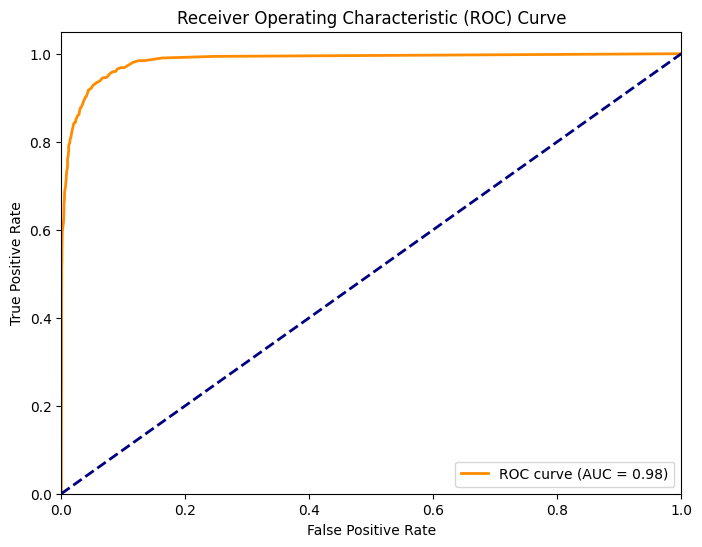

AUC (Area Under the ROC Curve): 0.9844708697928352


In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (good cycles)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print("AUC (Area Under the ROC Curve):", roc_auc)

In [54]:
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels in y_test (0 for "bad," 1 for "good")

# Get model predictions
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Print TP, TN, FP, FN
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)


Confusion Matrix:
[[4369   88]
 [ 132  693]]
True Positives (TP): 693
True Negatives (TN): 4369
False Positives (FP): 88
False Negatives (FN): 132


### Loading in the test data and performing initial cleaning

In [55]:
df_test = pd.read_csv('/content/test_data.csv')

In [56]:
df_filtered_test = df_test.drop(["Period Code", "B_4", "B_5", "B_9", "B_10", "B_14","B_20", "B_22", "B_23"], axis=1)
df_filtered_test.head()

Cycle ID          B_2      B_3   B_15    B_16     B_17     B_18    B_19  \
0      127      -0.0014  -0.0003  47.28  521.83  2388.04  8158.04  8.4314   
1      128      -0.0003   0.0003  47.35  521.84  2388.02  8154.69  8.3897   
2      129       -0.002        0   47.2  522.02  2388.01  8152.23  8.4298   
3      130  no response  -0.0002   47.4  521.67     2388  8158.26  8.4078   
4      Bad      -0.0011   0.0003  47.31   521.8  2388.01  8154.09   8.449   

  B_21   B_24     B_25       timestamp  
0  393  39.07    23.28  4/27/2020 7:20  
1  391   38.8  23.3672  4/27/2020 7:25  
2  392  38.87  23.3531  4/27/2020 7:30  
3  391  39.02  23.2821  4/27/2020 7:35  
4  391  38.89  23.2888  4/27/2020 7:40

In [57]:
column_list = ["B_2", "B_3","B_15", "B_16", "B_17", "B_18", "B_19", "B_21", "B_24", "B_25"]
for i in column_list:
  for j in outliers:
    df_filtered_test.loc[df_filtered_test[i] == j, i] = np.nan
  df_filtered_test[i].fillna(method = "ffill", inplace=True)
  print(df_filtered_test[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0


In [58]:
numeric_columns = ["B_2", "B_3","B_15", "B_16", "B_17", "B_18", "B_19", "B_21", "B_24", "B_25"]

for i in numeric_columns:
  df_filtered_test[i] = pd.to_numeric(df_filtered_test[i])

df_filtered_test.dtypes

Cycle ID      object
B_2          float64
B_3          float64
B_15         float64
B_16         float64
B_17         float64
B_18         float64
B_19         float64
B_21           int64
B_24         float64
B_25         float64
timestamp     object
dtype: object

In [59]:
#df_filtered_test["Cycle ID"].fillna("nan", inplace=True)

In [60]:
#df_filtered_test['timestamp'] = pd.to_datetime(df_filtered_test['timestamp'], errors='coerce')

# Extract day, month, year, hours, minutes, and seconds into separate columns
#df_filtered_test['day'] = df_filtered_test['timestamp'].dt.day
#df_filtered_test['month'] = df_filtered_test['timestamp'].dt.month
#df_filtered_test['year'] = df_filtered_test['timestamp'].dt.year
#df_filtered_test['hour'] = df_filtered_test['timestamp'].dt.hour
#df_filtered_test['minute'] = df_filtered_test['timestamp'].dt.minute
#df_filtered_test['second'] = df_filtered_test['timestamp'].dt.second

In [61]:
X_test_data = df_filtered_test[['B_2', 'B_3', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_21', 'B_24', 'B_25']]

In [62]:
y_pred_test = clf.predict(X_test_data)

In [63]:
d = {"ID": df_filtered_test["timestamp"].astype(str) + "-" + df_filtered_test["Cycle ID"].astype(str), "Good/Bad": y_pred_test}

In [64]:
d

{'ID': 0        4/27/2020 7:20-127
 1        4/27/2020 7:25-128
 2        4/27/2020 7:30-129
 3        4/27/2020 7:35-130
 4        4/27/2020 7:40-Bad
                ...         
 4122    5/11/2020 14:50-196
 4123    5/11/2020 14:55-197
 4124    5/11/2020 15:00-198
 4125    5/11/2020 15:05-199
 4126    5/11/2020 15:10-200
 Length: 4127, dtype: object,
 'Good/Bad': array([0, 0, 0, ..., 1, 1, 1])}

### Saving final result

In [65]:
df_submission = pd.DataFrame(data = d)

In [66]:
df_submission

ID  Good/Bad
0      4/27/2020 7:20-127         0
1      4/27/2020 7:25-128         0
2      4/27/2020 7:30-129         0
3      4/27/2020 7:35-130         0
4      4/27/2020 7:40-Bad         0
...                   ...       ...
4122  5/11/2020 14:50-196         1
4123  5/11/2020 14:55-197         1
4124  5/11/2020 15:00-198         1
4125  5/11/2020 15:05-199         1
4126  5/11/2020 15:10-200         1

[4127 rows x 2 columns]

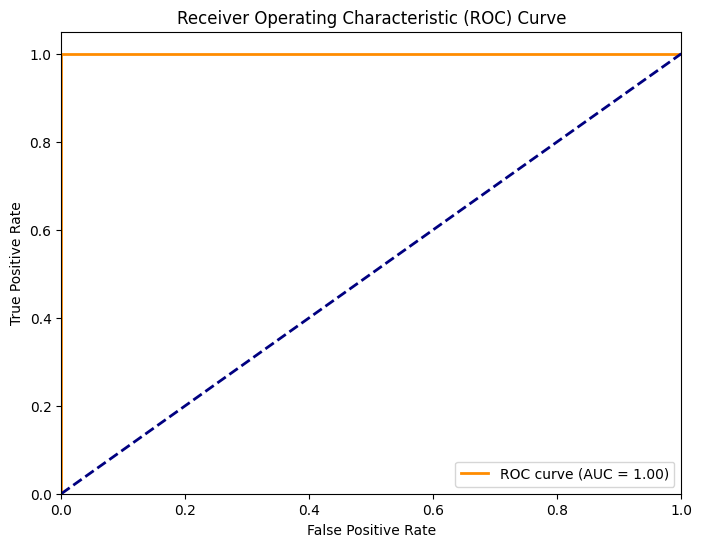

AUC (Area Under the ROC Curve): 1.0


In [67]:
# Get predicted probabilities for class 1 (good cycles)
y_pred_test_prob = clf.predict_proba(X_test_data)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_pred_test, y_pred_test_prob)

# Calculate AUC score
roc_auc = roc_auc_score(y_pred_test, y_pred_test_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print("AUC (Area Under the ROC Curve):", roc_auc)

In [68]:
df_submission["ID"] = df_submission["ID"].astype(str)

In [69]:
df_submission.to_csv("output.csv", index=False)

In [70]:
df_submission.dtypes

ID          object
Good/Bad     int64
dtype: object

# Thank you!